## Supervised Learning - LR - L1 & L2 - Electric Vehicles Price Prediction



* Main objective of the analysis - My Model will combine predicition and interpetation, i would like to:

    1. predict the sale price of an EV based on it's features.
    2. understand which features are with the highest impcat on the sale price

#### Brief description of the data set and its attributes:
    
* Brand               object - field that defines the car Brand - e.g. Tesla
* Model               object - field that defines the car's Model - e.g. Model 3
* AccelSec           float64 - field that defines the car's acceleration 0-100 km/h - e.g. 5.2 sec   
* TopSpeed_KmH         int64 - field that defines the car's top speed
* Range_Km             int64 - field that defines the car's Range in Km
* Efficiency_WhKm      int64 - field that defines the car's Efficiency
* FastCharge_KmH      object - field that defines the car's fast charge coverege, how much Km can we get from it
* RapidCharge         object - field that defines the car's Rapid change - Yes/No
* PowerTrain          object - field that defines the car's powertrain - e.g. awd, rwd etc
* PlugType            object - field that defines the car's plug type
* BodyStyle           object - field that defines the car's body style - e.g. sedan, coupe
* Segment             object - field that defines the car's segment from A - E
* Seats                int64 - field that defines the car's numer of seats in total pass + driver
* PriceEuro            int64 - field that defines the car's Price in Euro

#### in  Total - Rows X Col (103, 14)

Our dataset has 11 features that i will use to predict new EV price
i would like to map the impact of every feature, in this case i will not use the car make or model as features for prediction, i will use only technical features.

before we begin i would like to explore the data and perform prelimnat EDA and Analysis

# Part 1(EDA):

In [127]:
# import the needed lib's
import numpy as np
import pandas as pd
import matplotlib as plt


#define the file name
filename = 'ElectricCarData_Clean.csv'

#import the data set
ev_ds = pd.read_csv(filename,sep=',')

#display the head
pd.value_counts(ev_ds.Brand)

ev_ds


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [128]:
#display data types of the data set

print("Display of the types of data in the DS:\n",ev_ds.dtypes)

print("Display of data types value count in the DS:\n",ev_ds.dtypes.value_counts())

print("Colmuns x Rows: ",ev_ds.shape)

Display of the types of data in the DS:
 Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object
Display of data types value count in the DS:
 object     8
int64      5
float64    1
dtype: int64
Colmuns x Rows:  (103, 14)


In [129]:
#describe the data from numerical POV
ev_ds.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [130]:
#display using pivot the body style vs. Rapid charge
pivot_rc = pd.pivot_table(ev_ds,values='Model', index='BodyStyle',columns='RapidCharge',aggfunc=np.count_nonzero)
pivot_rc

RapidCharge,No,Yes
BodyStyle,,
Cabrio,1.0,2.0
Hatchback,3.0,29.0
Liftback,NaN,5.0
MPV,NaN,1.0
Pickup,NaN,3.0
SPV,1.0,2.0
SUV,NaN,45.0
Sedan,NaN,10.0
Station,NaN,1.0


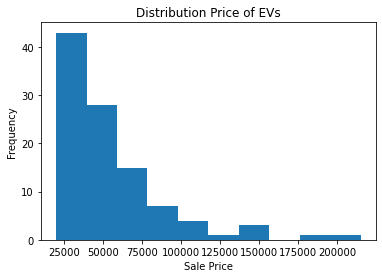

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = ev_ds['PriceEuro'].plot.hist(bins=10)
ax.set(xlabel='Sale Price', 
       ylabel='Frequency',
       title='Distribution Price of EVs');

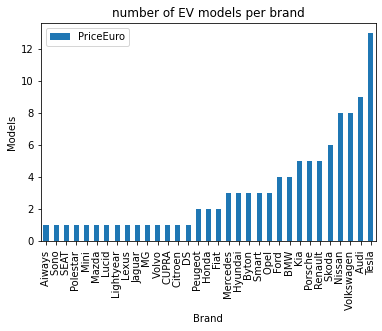

In [133]:
#EV models by brand

pivot_sales = pd.pivot_table(ev_ds, values='PriceEuro',index='Brand', aggfunc=np.count_nonzero)

pivot_sales = pivot_sales.sort_values(by=['PriceEuro'])

az = pivot_sales.plot.bar()
az.set(xlabel='Brand', 
       ylabel='Models',
       title='number of EV models per brand');

# Part 2:

In [134]:
#data encoding:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#separate the sale price from the data set
y = pd.DataFrame(ev_ds.PriceEuro)



#remove sale price from "x" Data set
x = ev_ds.drop(columns=['PriceEuro'])

ohc = OneHotEncoder()
le = LabelEncoder()

#copy the data in order to hot encode
x_ohc = x.copy()

#mask the columns that are 
mask = x.dtypes != object
col_name = x.columns[mask]

x_ohc = x_ohc.drop(columns=col_name)

#export the featuers that are not object to a new DF
x_num = x[col_name]

x_he = pd.DataFrame()

#display the data that is numerical(not encoded)
x_num


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats
0,4.6,233,450,161,5
1,10.0,160,270,167,5
2,4.7,210,400,181,5
3,6.8,180,360,206,5
4,9.5,145,170,168,4
...,...,...,...,...,...
98,7.5,160,330,191,5
99,4.5,210,335,258,5
100,5.9,200,325,194,5
101,5.1,200,375,232,5


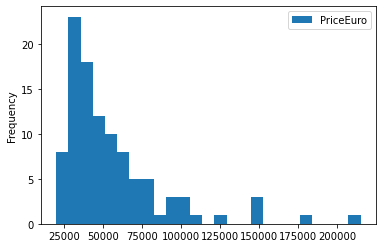

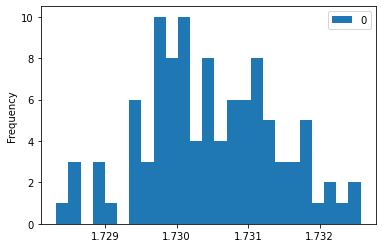

In [135]:
from scipy import stats

#since the Y is some how not dist normally i will boxcox it
ax = y.plot.hist(bins=25)


#perform boxcox to normalize:
y_bc_fit, y_lambda_fit = stats.boxcox(y.PriceEuro)
y_normal = pd.DataFrame(y_bc_fit)
ax = y_normal.plot.hist(bins=25)


In [136]:
#create the new data set in order to interpet the model 1 data set is numerical the other is hotencoded

for col in x_ohc.columns:
    
    # Integer encode the string categories
    dat = le.fit_transform(x_ohc[col]).astype(int)
    
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(i)]) for i in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=x_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    x_he = pd.concat([x_he, new_df], axis=1)
    
x_he

,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,Brand_7,Brand_8,Brand_9,...,BodyStyle_7,BodyStyle_8,Segment_0,Segment_1,Segment_2,Segment_3,Segment_4,Segment_5,Segment_6,Segment_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Part 3:
at this point we have 2 Data frames one is numerical and the other is hot encoded for the objects.
It's time to do Train, Test, Split

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#scale the features
#ss = StandardScaler()
#x_num_ss = ss.fit_transform(x_num)

#add polynomial features - deg 2
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(x_num)

#train test split the numerical data
X_train, X_test, y_train, y_test = train_test_split(X_pf, y_normal, test_size=0.2, random_state = 42)


In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Vannila linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_lr = r2_score(y_pred, y_test)
print(f'The r2 Score for Vanilla Regression is: {r2_lr}')
lr.coef_

The r2 Score for Vanilla Regression is: 0.8396177445113168


array([[-7.65320856e-04,  2.00056435e-05,  6.85953911e-07,
         4.95151181e-05, -1.35725882e-03,  1.70370119e-05,
         9.21773832e-07,  7.60390716e-07, -1.38321502e-06,
         5.53451245e-05, -2.29807928e-08, -1.33890380e-08,
         5.20971661e-08, -1.96347730e-06,  1.22681752e-08,
        -8.71837236e-08,  9.30499529e-07, -8.35166047e-08,
         4.29079520e-06,  2.30458485e-05]])

In [261]:
from sklearn.linear_model import Ridge

#perform ridge regression
rdg = Ridge(alpha = 0.001)
rdg.fit(X_train,y_train)
y_pred_ridge = lr.predict(X_test)
r2_ridge = r2_score(y_pred_ridge, y_test)
print(f'The r2 Score for Ridge Regression is: {r2_ridge}')
rdg.coef_

The r2 Score for Ridge Regression is: 0.8396177445113168


array([[-7.62686814e-04,  2.03209603e-05,  6.67776450e-07,
         4.93324312e-05, -1.34283653e-03,  1.70262188e-05,
         9.11786468e-07,  7.61978053e-07, -1.37230340e-06,
         5.46674783e-05, -2.34005858e-08, -1.34255075e-08,
         5.26413524e-08, -2.00085760e-06,  1.22987618e-08,
        -8.70863030e-08,  9.24945498e-07, -8.34804679e-08,
         4.28254069e-06,  2.31517764e-05]])

In [264]:
from sklearn.linear_model import Lasso

#perform lasso regression
las = Lasso(alpha = 0.00001, max_iter=1000000)
las.fit(X_train,y_train)
y_pred_lasso = las.predict(X_test)
r2_las = r2_score(y_pred_lasso,y_test)
print(f'The r2 Score for Lasso Regression is: {r2_las}')
cnv = pd.DataFrame(las.coef_)

cnv


The r2 Score for Lasso Regression is: 0.868729812142259


,0
0,-0.000000e+00
1,8.166693e-05
2,-0.000000e+00
3,6.027906e-05
4,-0.000000e+00
5,1.402779e-05
6,-7.789691e-07
7,9.463148e-07
8,-1.997484e-06
9,-1.977916e-05


# Insights and key findings:
after performing 3 types of regression we can see that Lasso gave the highest r2 score.
Standard scaler and boxcox on the y model value did not improve the r2 score for any of the regression models.

* increasing the alpha in lasso can increase abit the r2 score.
* optimal value for polynomial features is 2

# Next steps:

The next recommended steps that i would take is apply different models, i think that some model of classification might increase the pprediction success, since many of the features are Objects.